### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "xing_nb_scan_round_150_1500_higher_chroma"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  i_oct_b1 i_oct_b2 dqx  dqy  qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                      
lhcb1 -60.0    -60.0    15.0 15.0 62.315 60.32 8.000000e+10            2.5       2.5       120.0               base_collider   
                                                                                           130.0               base_collider   
                                                                                           140.0               base_collider   
                                                                                           150.0               base_collider   
                                                                                           160.0               base_collider   
...                                                                                                                      ...   
                                               1.600000e+11            2.5       2.5       230.0               base_collider   
                                                                                           240.0               base_collider   
                                                                                           250.0               base_collider   
                                                                                           260.0               base_collider   
                                                                                           270.0               base_collider   

                                                                                                           normalized amplitude in xy-plane  \
beam  i_oct_b1 i_oct_b2 dqx  dqy  qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                                     
lhcb1 -60.0    -60.0    15.0 15.0 62.315 60.32 8.000000e+10            2.5       2.5       120.0                                      2.483   
                                                                                           130.0                                      3.034   
                                                                                           140.0                                      3.655   
                                                                                           150.0                                      4.207   
                                                                                           160.0                                      4.483   
...                                                                                                                                     ...   
                                               1.600000e+11            2.5       2.5       230.0                                      4.138   
                                                                                           240.0                                      4.690   
                                                                                           250.0                                      5.172   
                                                                                           260.0                                      5.517   
                                                                                           270.0                                      5.310   

                                                                                                               qx  \
beam  i_oct_b1 i_oct_b2 dqx  dqy  qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle           
lhcb1 -60.0    -60.0    15.0 15.0 62.315 60.32 8.000000e+10            2.5       2.5       120.0           62.315   
                                                                                           130.0           62.315   
                                                                                           140.0           62.315

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot

crossing_angle,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0
num_particles_per_bunch,,,,,,,,,,,,,,,,
8.000000e+10,2.483,3.034,3.655,4.207,4.483,5.103,5.103,5.655,5.241,5.862,5.862,6.069,6.069,6.345,6.897,6.897
8.500000e+10,2.621,2.897,3.379,3.931,4.483,4.828,5.103,5.448,5.241,5.448,5.586,6.138,5.862,6.621,6.276,5.793
9.000000e+10,2.414,2.828,2.966,3.586,4.276,4.483,5.034,5.379,5.448,5.586,5.931,6.069,6.000,6.759,6.207,5.931
9.500000e+10,2.345,2.690,2.966,3.310,3.448,4.552,4.828,5.379,5.172,5.310,5.586,5.862,6.690,6.621,6.414,6.414
1.000000e+11,2.207,2.621,3.172,3.172,3.310,4.069,4.828,5.103,5.448,5.310,5.586,5.793,5.517,5.862,6.138,5.724
1.050000e+11,2.000,2.483,2.828,3.241,3.310,3.862,4.552,4.690,5.310,5.310,5.379,5.586,5.793,5.862,6.414,6.345
1.100000e+11,2.000,2.483,2.966,3.172,3.379,3.862,3.931,4.897,5.172,5.310,5.310,5.586,5.724,5.724,6.138,5.931
1.150000e+11,2.000,2.069,2.759,3.172,3.310,3.724,3.793,4.483,4.966,5.172,5.310,5.379,5.724,5.724,5.517,5.655
1.200000e+11,2.000,2.000,2.621,2.759,3.172,3.586,4.000,4.207,4.759,5.310,5.034,5.586,5.241,5.517,5.655,5.793


In [4]:
df_for_levels = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="lumi_ip_1_5")
df_for_levels

crossing_angle,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0
num_particles_per_bunch,,,,,,,,,,,,,,,,
8.000000e+10,3.370460e+34,3.342661e+34,3.334984e+34,3.334916e+34,3.337796e+34,3.341714e+34,3.345841e+34,3.338624e+34,3.310901e+34,3.264065e+34,3.200364e+34,3.122607e+34,3.034767e+34,2.938044e+34,2.836317e+34,2.732116e+34
8.500000e+10,3.873332e+34,3.818197e+34,3.798230e+34,3.792415e+34,3.792586e+34,3.795291e+34,3.798970e+34,3.790046e+34,3.758021e+34,3.704400e+34,3.631698e+34,3.543090e+34,3.443509e+34,3.333414e+34,3.217686e+34,3.099197e+34
9.000000e+10,4.437377e+34,4.345487e+34,4.307607e+34,4.292846e+34,4.288403e+34,4.288697e+34,4.291132e+34,4.279755e+34,4.242575e+34,4.181187e+34,4.098378e+34,3.997708e+34,3.885310e+34,3.760498e+34,3.629413e+34,3.495292e+34
9.500000e+10,5.057139e+34,4.920868e+34,4.859473e+34,4.832432e+34,4.821390e+34,4.818040e+34,4.818434e+34,4.803887e+34,4.760769e+34,4.690736e+34,4.596844e+34,4.483052e+34,4.356854e+34,4.216156e+34,4.068532e+34,3.917606e+34
1.000000e+11,5.728663e+34,5.542495e+34,5.451924e+34,5.409015e+34,5.389212e+34,5.380892e+34,5.378402e+34,5.359957e+34,5.310147e+34,5.230649e+34,5.124777e+34,4.996898e+34,4.855978e+34,4.698335e+34,4.533104e+34,4.364315e+34
1.050000e+11,6.448702e+34,6.209843e+34,6.084415e+34,6.021691e+34,5.990701e+34,5.975923e+34,5.969614e+34,5.946493e+34,5.889226e+34,5.799458e+34,5.680747e+34,5.537868e+34,5.381334e+34,5.205756e+34,5.021920e+34,4.834278e+34
1.100000e+11,7.213719e+34,6.923055e+34,6.757315e+34,6.670437e+34,6.625501e+34,6.602559e+34,6.591363e+34,6.562707e+34,6.497175e+34,6.396321e+34,6.263916e+34,6.105141e+34,5.932122e+34,5.737652e+34,5.534252e+34,5.326805e+34
1.150000e+11,7.893897e+34,7.682354e+34,7.471526e+34,7.355812e+34,7.293794e+34,7.260725e+34,7.243409e+34,7.208248e+34,7.133579e+34,7.020785e+34,6.873818e+34,6.698252e+34,6.507875e+34,6.293572e+34,6.069665e+34,5.841485e+34
1.200000e+11,8.413551e+34,8.487560e+34,8.228192e+34,8.078744e+34,7.996129e+34,7.950677e+34,7.925816e+34,7.883048e+34,7.798284e+34,7.672645e+34,7.510217e+34,7.316948e+34,7.108339e+34,6.873262e+34,6.627913e+34,6.378078e+34


In [5]:
array_xing = np.linspace(120, 270, 16, endpoint=True)
df_to_plot.columns = [str(xing) for xing in array_xing]
df_to_plot.index /= 1e11 

df_for_levels.columns = [str(xing) for xing in array_xing]
df_for_levels.index /= 1e11

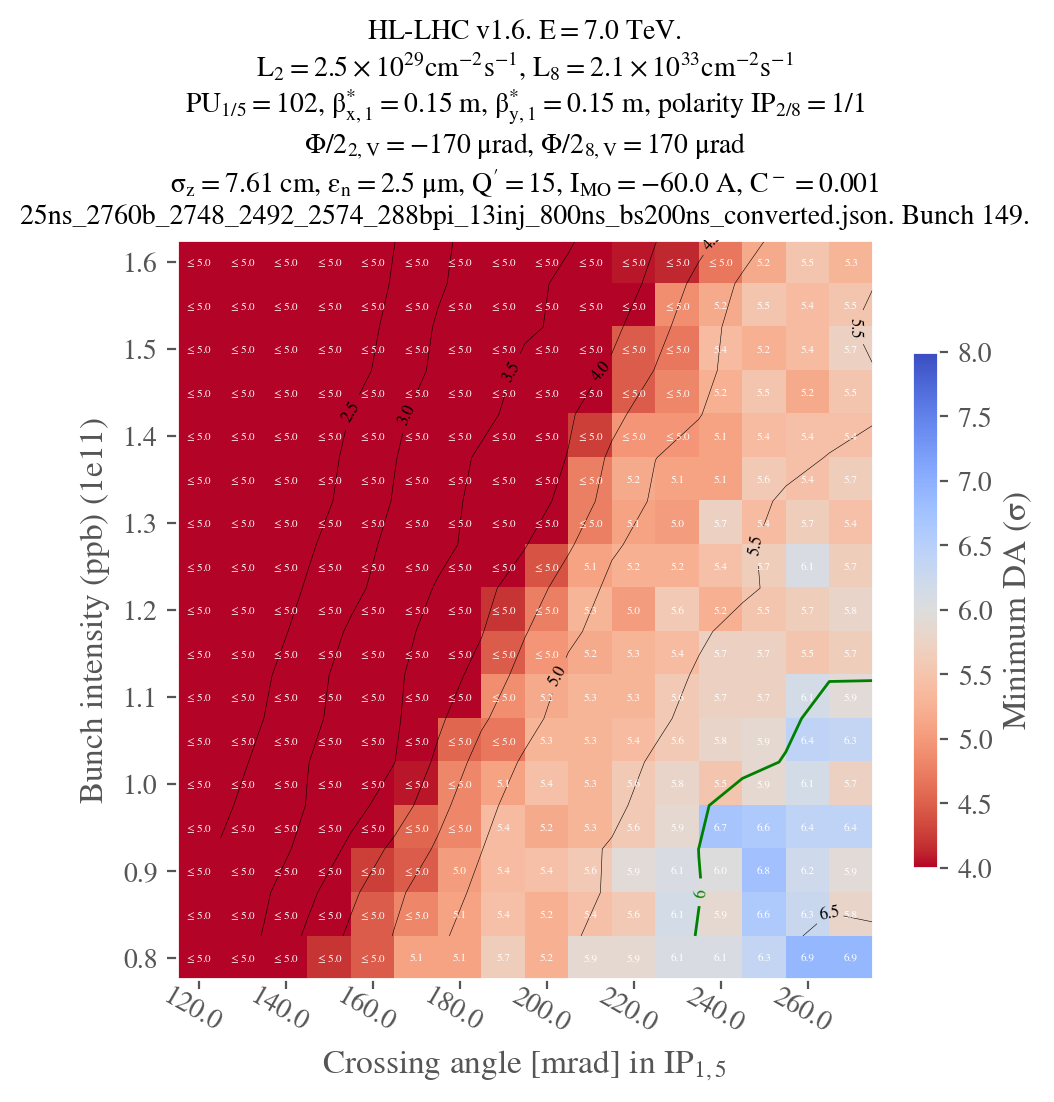

In [6]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx=0.15,
    bety=0.15,
    Nb=False,
    symmetric=False,
    mask_lower_triangle=False,
    green_contour=6.,
    extended_diagonal=False,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    display_xing = False,
    ignore_lumi_1_5 = True,
    vmin=4.,
    vmax=8.0,
    CC = False,
    xlabel = r"Crossing angle [mrad] in IP$_{1,5}$",
    ylabel = r"Bunch intensity (ppb) $(1e11)$",
)
# ! Verified


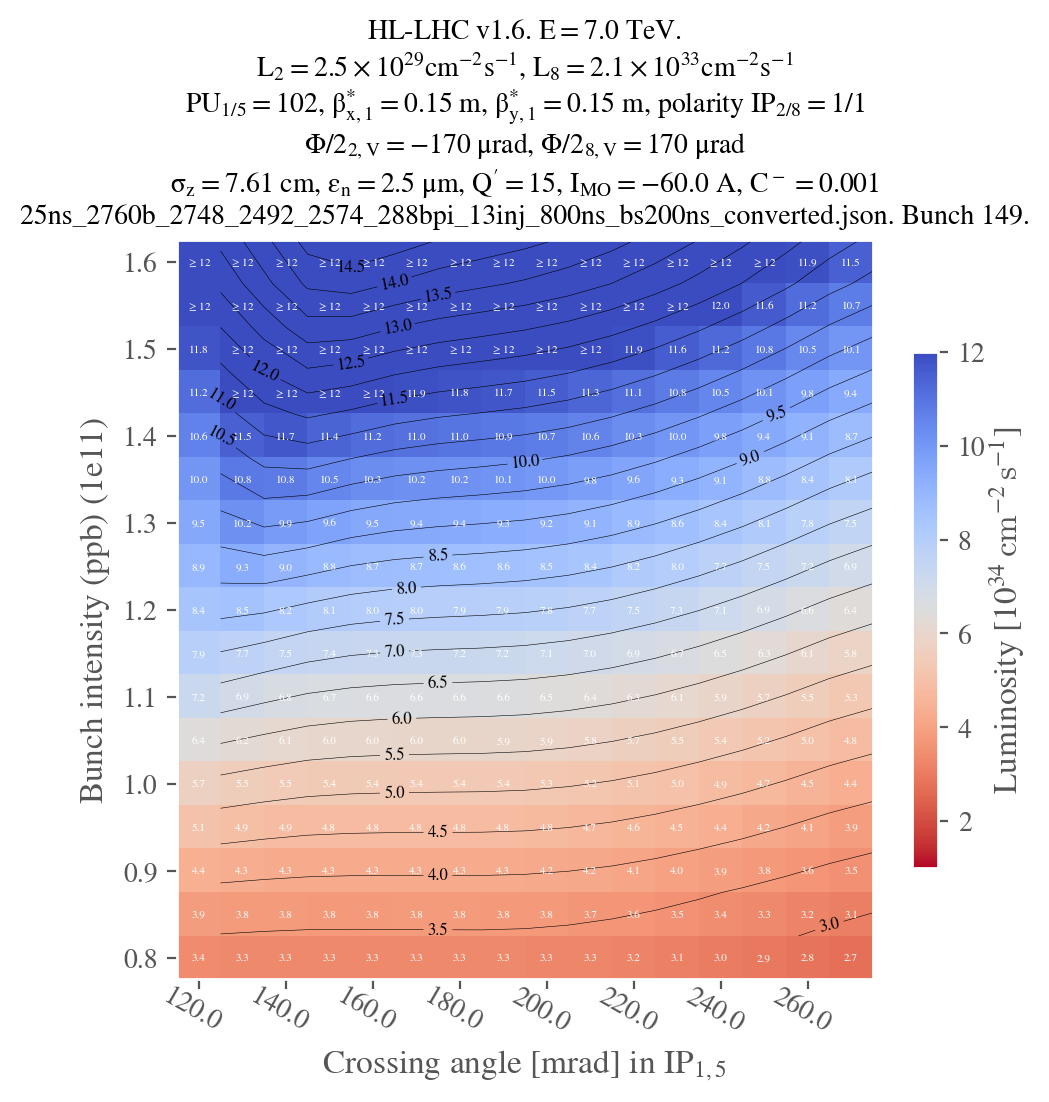

In [7]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)["config_mad"]
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
df_for_levels /= 1e34
analysis_functions.plot_heatmap(
    df_for_levels,
    f"{STUDY_NAME}_{COLLIDER}_isolumi",
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx=0.15,
    bety=0.15,
    Nb=False,
    symmetric=False,
    mask_lower_triangle=False,
    green_contour=15.0,
    extended_diagonal=False,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    display_xing=False,
    ignore_lumi_1_5=True,
    vmin=1,
    vmax=12,
    CC=False,
    xlabel=r"Crossing angle [mrad] in IP$_{1,5}$",
    ylabel=r"Bunch intensity (ppb) $(1e11)$",
    label_cbar=r"Luminosity [$10^{34} \, \mathrm{cm}^{-2} \, \mathrm{s}^{-1}$]",
)